# **Uber Travel History Prediction**

Import all the Necessary Libraries

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read the Dataset and print the first 5 dataframes

In [ ]:
df=pd.read_csv("/content/UberDataset.csv")
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
df['PURPOSE']

0        Meal/Entertain
1                   NaN
2       Errand/Supplies
3               Meeting
4        Customer Visit
             ...       
1151     Temporary Site
1152            Meeting
1153     Temporary Site
1154     Temporary Site
1155                NaN
Name: PURPOSE, Length: 1156, dtype: object

In [ ]:
df["MILES"].max()

12204.7

Check whether if there are any Null Values

In [ ]:
df.isnull()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1151,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False
1154,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [ ]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [ ]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


Import all the Necessary Libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
print(df.columns)


Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')


# **1. Travel Pattern Analysis:** Analyze travel patterns to identify frequent travel routes and destinations.

In [ ]:
df['STOP'].nunique()

188

Count the Routes which they travel frequently

In [ ]:
df['Route'] = df['START'] + ' to ' + df['STOP']

In [ ]:
route_counts = df['Route'].value_counts()

In [ ]:
route_counts.iloc[0:10]

Unknown Location to Unknown Location    86
Morrisville to Cary                     75
Cary to Morrisville                     67
Cary to Cary                            53
Cary to Durham                          36
Durham to Cary                          32
Islamabad to Unknown Location           28
Unknown Location to Islamabad           28
Lahore to Lahore                        27
Islamabad to Islamabad                  25
Name: Route, dtype: int64

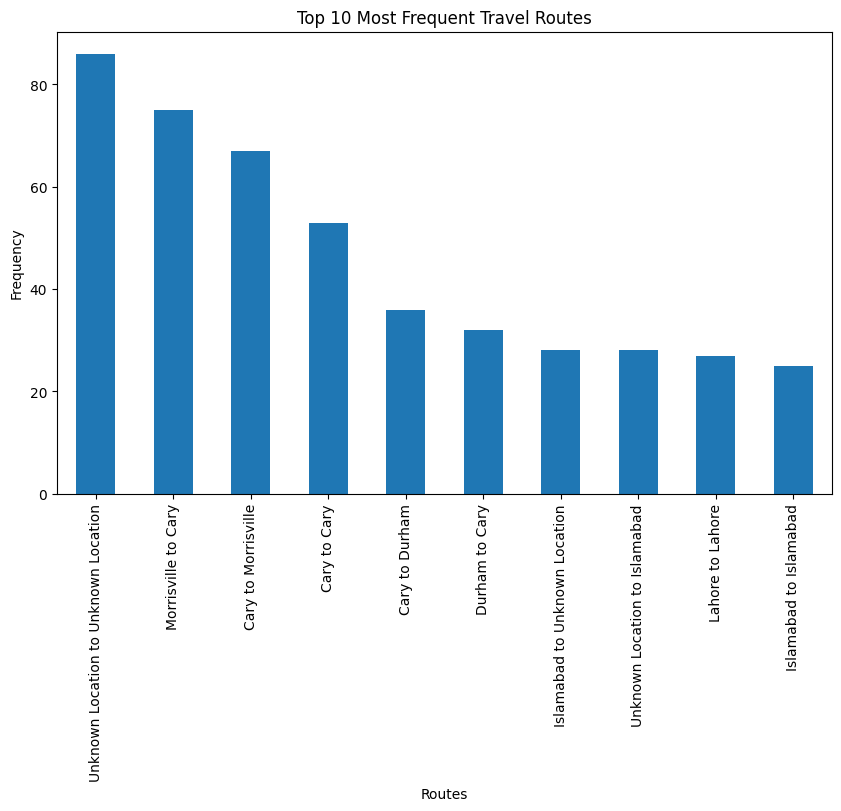

In [ ]:
plt.figure(figsize=(10, 6))
route_counts.head(10).plot(kind='bar')
plt.title('Top 10 Most Frequent Travel Routes')
plt.xlabel('Routes')
plt.ylabel('Frequency')
plt.show()

Plot a graph that visualizes the top 10 most frequent travel routes based on the data in your dataset.

# **2. Travel Duration Analysis:** Study the duration of travel trips to understand average travel times.


In [ ]:
df_1 = df['START_DATE'].describe()
df_1

count                1156
unique               1155
top       6/28/2016 23:34
freq                    2
Name: START_DATE, dtype: object

In [ ]:
df_2= df['END_DATE'].describe()
df_2

count                1155
unique               1154
top       6/28/2016 23:59
freq                    2
Name: END_DATE, dtype: object

In [ ]:
from datetime import datetime

In [ ]:
df = df[df['START_DATE'] != 'Totals']

Convert the START_DATE and END_DATE to datetime if necessary

In [ ]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'])
df['END_DATE'] = pd.to_datetime(df['END_DATE'])

Now find out the Trip Duration to find out the Average time travel

In [ ]:
df['trip_duration'] = df['END_DATE'] - df['START_DATE']
df['trip_duration']

0      0 days 00:06:00
1      0 days 00:12:00
2      0 days 00:13:00
3      0 days 00:14:00
4      0 days 01:07:00
             ...      
1150   0 days 00:07:00
1151   0 days 00:18:00
1152   0 days 00:35:00
1153   0 days 00:18:00
1154   0 days 01:43:00
Name: trip_duration, Length: 1155, dtype: timedelta64[ns]

In [ ]:
avg_time_travel = df['trip_duration'].mean()
avg_time_travel

Timedelta('0 days 00:23:14.597402597')

In [ ]:
df['trip_duration'].describe()

count                         1155
mean     0 days 00:23:14.597402597
std      0 days 00:27:19.096606181
min                0 days 00:00:00
25%                0 days 00:10:00
50%                0 days 00:16:00
75%                0 days 00:27:30
max                0 days 05:36:00
Name: trip_duration, dtype: object

In [ ]:
df['trip_duration'] = pd.to_timedelta(df['trip_duration']).dt.total_seconds() / 60

In [ ]:
average_travel_time = df['trip_duration'].mean()
print(f"Average travel time: {average_travel_time:.2f} minutes")

Average travel time: 23.24 minutes


In [ ]:
median_travel_time = df['trip_duration'].median()

In [ ]:
print(f"Median travel time: {median_travel_time: .2f} minutes")

Median travel time:  16.00 minutes


Plot a histogram graph to visualize the distribution of trip durations in minutes.

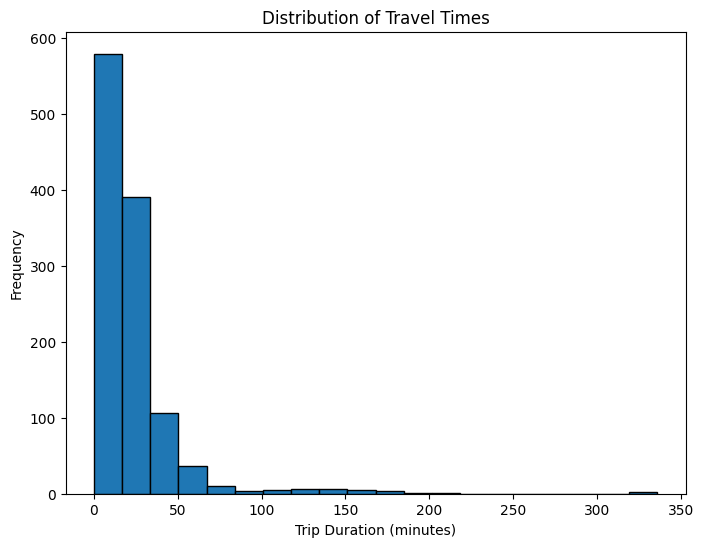

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['trip_duration'], bins=20, edgecolor='black')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Travel Times')
plt.show()

In the above bar plot we can see that there is high frequency between 0 to 50 minutes  

# **3. Travel Category Comparison:** Compare travel patterns and purposes across different travel categories (e.g., business, personal, commute).

In [ ]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE', 'Route', 'trip_duration'],
      dtype='object')

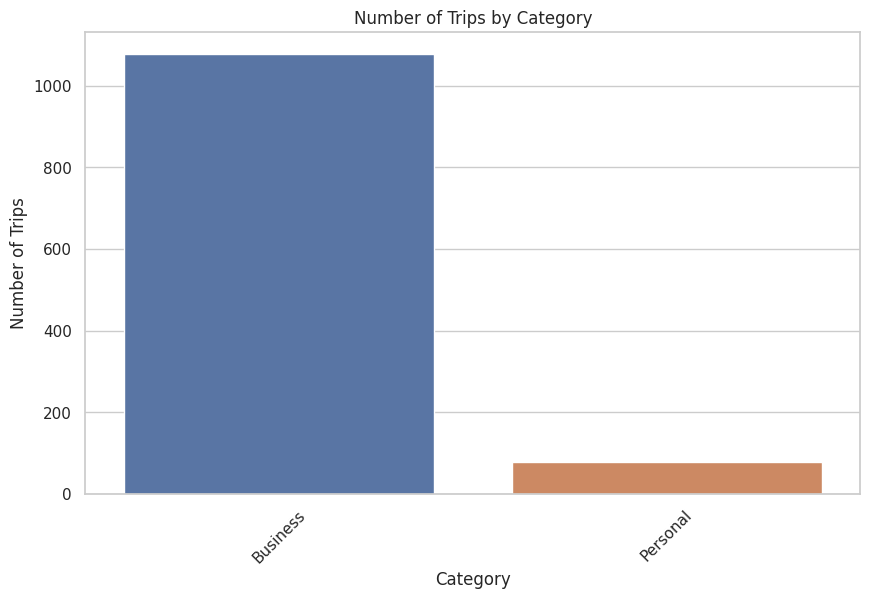

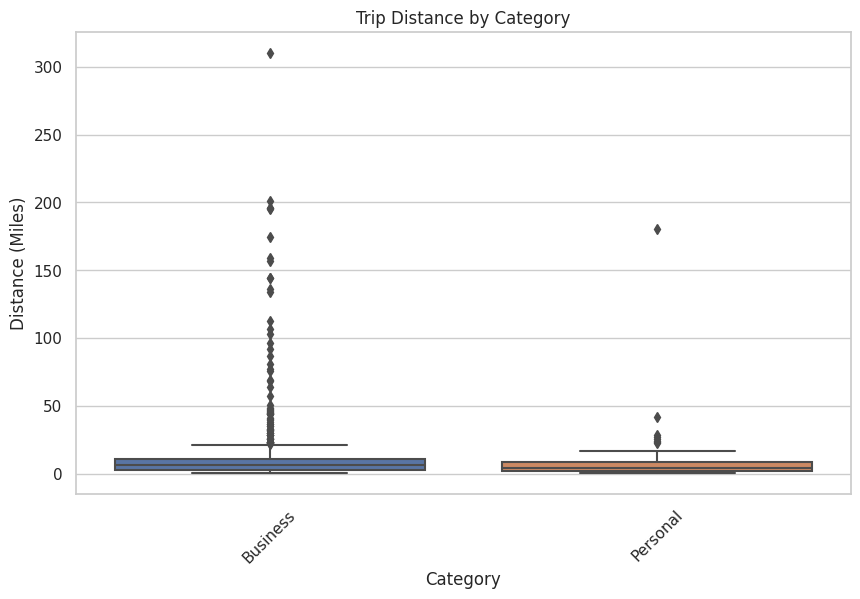

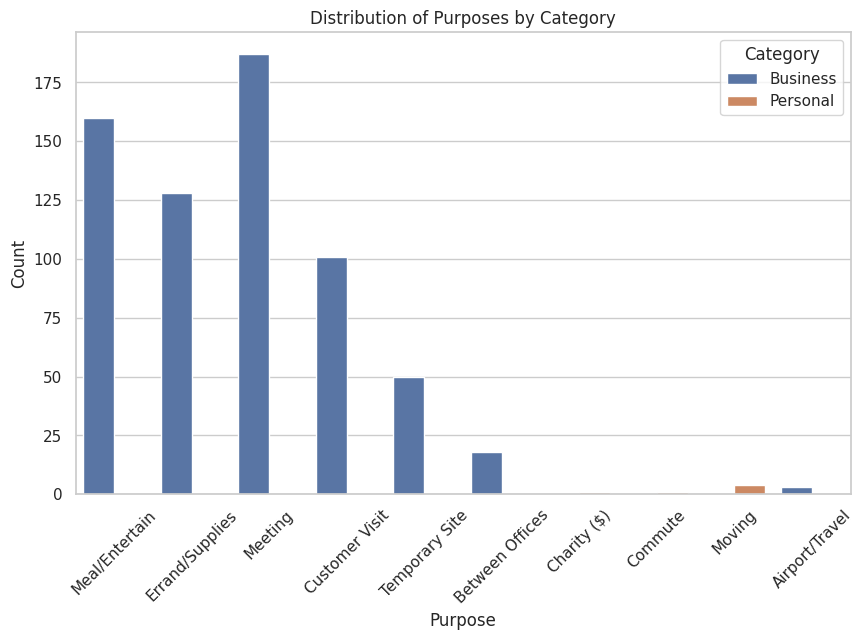

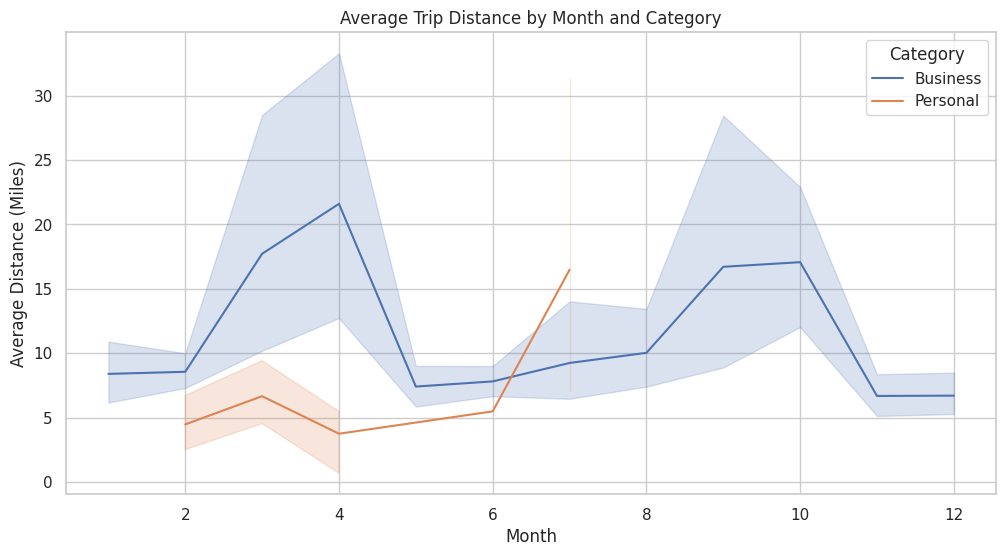

In [ ]:
category_counts = df['CATEGORY'].value_counts()

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title("Number of Trips by Category")
plt.xlabel("Category")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='CATEGORY', y='MILES', data=df)
plt.title("Trip Distance by Category")
plt.xlabel("Category")
plt.ylabel("Distance (Miles)")
plt.xticks(rotation=45)
plt.show()



plt.figure(figsize=(10, 6))
sns.countplot(x='PURPOSE', hue='CATEGORY', data=df)
plt.title("Distribution of Purposes by Category")
plt.xlabel("Purpose")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()

df['START_DATE'] = pd.to_datetime(df['START_DATE'])
df['END_DATE'] = pd.to_datetime(df['END_DATE'])

df['Year'] = df['START_DATE'].dt.year
df['Month'] = df['START_DATE'].dt.month

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='MILES', hue='CATEGORY', data=df)
plt.title("Average Trip Distance by Month and Category")
plt.xlabel("Month")
plt.ylabel("Average Distance (Miles)")
plt.legend(title='Category')
plt.show()


In the above bar plots we can see that there is Number of Trips by Category and Compare travel patterns and purposes across different travel categories

```
# This is formatted as code
```



# **4. Mileage Tracking:** Calculate and analyze the total miles traveled over time.


Convert the MILES to numeric dataframe if necessary

In [ ]:
df['Miles_Traveled'] = pd.to_numeric(df['MILES'])
df['Miles_Traveled']

0        5.1
1        5.0
2        4.8
3        4.7
4       63.7
        ... 
1150     0.7
1151     3.9
1152    16.2
1153     6.4
1154    48.2
Name: Miles_Traveled, Length: 1155, dtype: float64

In [ ]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE', 'Route', 'trip_duration', 'Year', 'Month', 'Miles_Traveled'],
      dtype='object')

In [ ]:
total_miles = df.groupby('trip_duration')['Miles_Traveled'].sum()

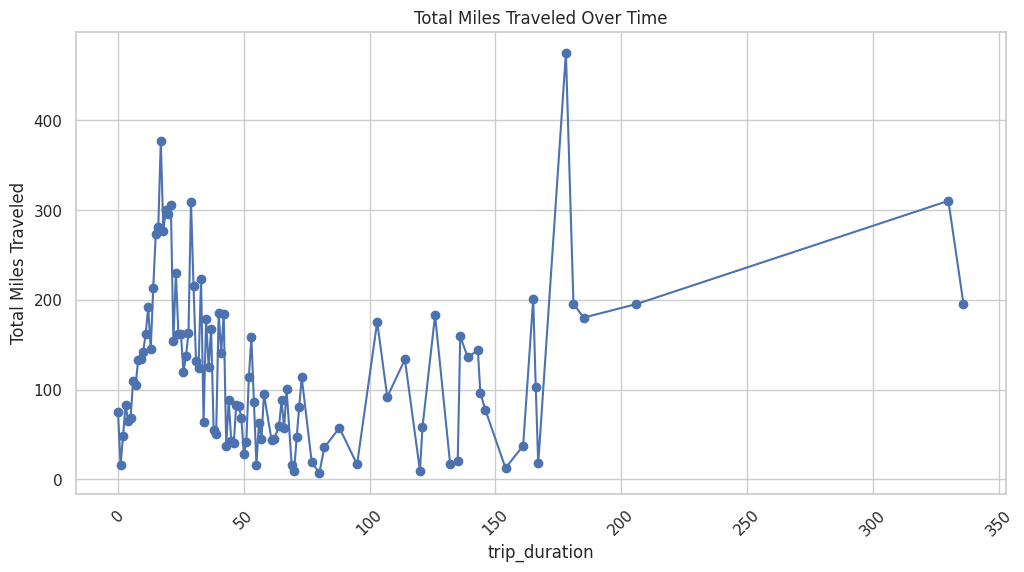

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(total_miles.index, total_miles.values, marker='o')
plt.xlabel('trip_duration')
plt.ylabel('Total Miles Traveled')
plt.title('Total Miles Traveled Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Plot a graph for the Total Miles Traveled Over Time

# **5. Travel Purpose Insights:** Explore the distribution of travel purposes to understand the reasons for travel

In [ ]:
travel_purpose_counts = df['PURPOSE'].value_counts()
travel_purpose_counts

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

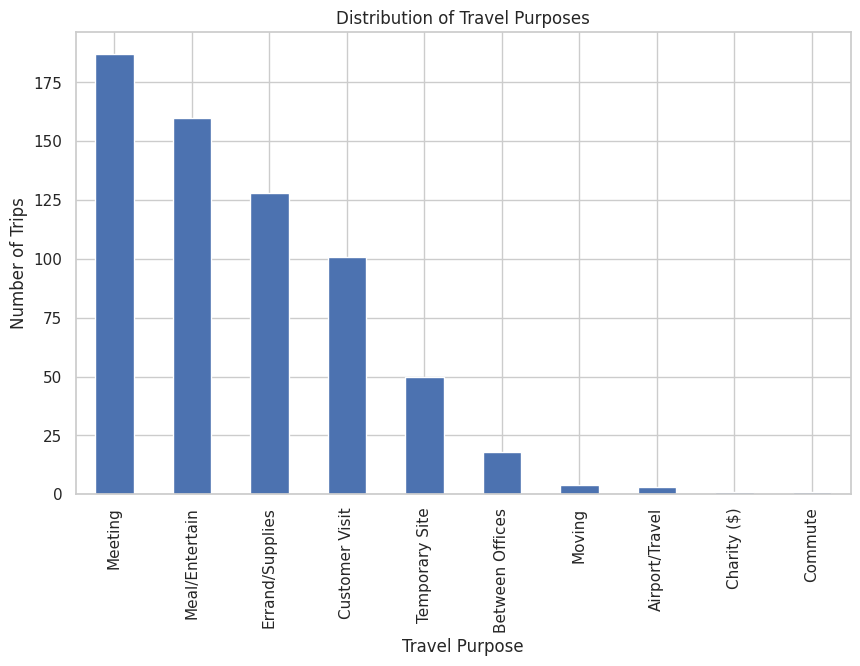

In [ ]:
plt.figure(figsize=(10, 6))
travel_purpose_counts.plot(kind='bar')
plt.xlabel('Travel Purpose')
plt.ylabel('Number of Trips')
plt.title('Distribution of Travel Purposes')
plt.grid(True)
plt.show()

Plot a graph for which Purpose and the Number of Trips they Travel distribution of travel purposes to understand the reasons for travel

# **6. Peak Travel Times:** Identify peak travel times and days based on start and end dates.

In [ ]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'])
df['END_DATE'] = pd.to_datetime(df['END_DATE'])

In [ ]:
start_day_hour_counts = df.groupby(['START_DATE']).size()
end_day_hour_counts = df.groupby(['END_DATE']).size()

In [ ]:
df['Start_Day_of_Week'] = df['START_DATE'].dt.day_name()
df['Start_Hour'] = df['START_DATE'].dt.hour
df['End_Day_of_Week'] = df['END_DATE'].dt.day_name()
df['End_Hour'] = df['END_DATE'].dt.hour
start_day_hour_counts = df.groupby(['Start_Day_of_Week', 'Start_Hour']).size().unstack()
end_day_hour_counts = df.groupby(['End_Day_of_Week', 'End_Hour']).size().unstack()


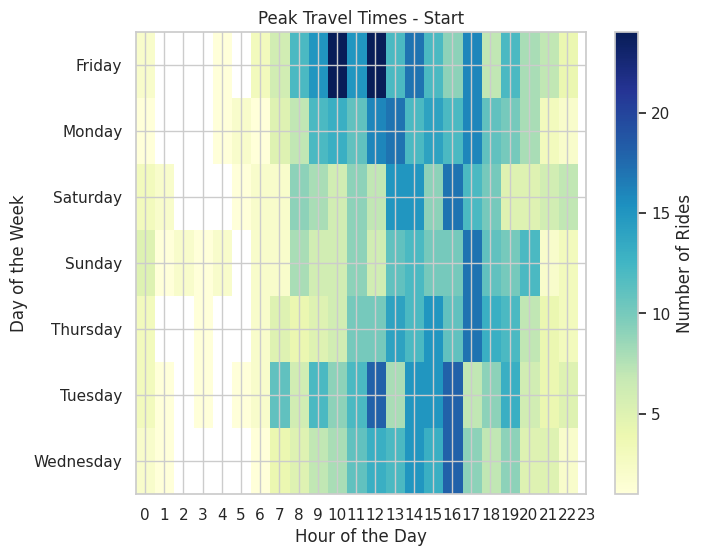

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.imshow(start_day_hour_counts, cmap='YlGnBu', aspect='auto')
plt.title('Peak Travel Times - Start')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.xticks(range(24))
plt.yticks(range(7), start_day_hour_counts.index)
plt.colorbar(label='Number of Rides')

Plot a Graph for the Peak Travel time-start in day of the week


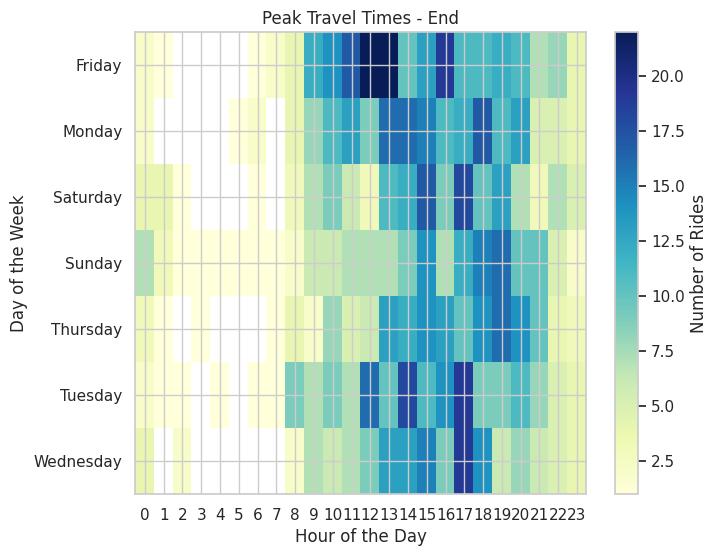

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 2)
plt.imshow(end_day_hour_counts, cmap='YlGnBu', aspect='auto')
plt.title('Peak Travel Times - End')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.xticks(range(24))
plt.yticks(range(7), end_day_hour_counts.index)
plt.colorbar(label='Number of Rides')
plt.show()

Plot a Graph for the Peak Travel time-end in day of the week

# **7. Travel Distance Analysis:** Analyze the distribution of travel distances to identify long-distance and short-distance trips.

In [ ]:
distance_stats = df['MILES'].describe()

Find out the Mean Distance, Long and also the Short Distance Threshold

In [ ]:
mean_distance = distance_stats['mean']
long_distance_threshold = mean_distance + 2 * distance_stats['std']
short_distance_threshold = mean_distance - 2 * distance_stats['std']
print(f"Mean Distance: {mean_distance:.2f} miles")
print(f"Long-Distance Threshold: {long_distance_threshold:.2f} miles")
print(f"Short-Distance Threshold: {short_distance_threshold:.2f} miles")

Mean Distance: 10.57 miles
Long-Distance Threshold: 53.73 miles
Short-Distance Threshold: -32.59 miles


Now find the Number of Trips for Long Distance as well as Short Distance

In [ ]:
long_distance_trips = df[df['MILES'] > long_distance_threshold]
short_distance_trips = df[df['MILES'] < short_distance_threshold]

In [ ]:
print(f"Number of Long-Distance Trips: {len(long_distance_trips)}")
print(f"Number of Short-Distance Trips: {len(short_distance_trips)}")

Number of Long-Distance Trips: 26
Number of Short-Distance Trips: 0


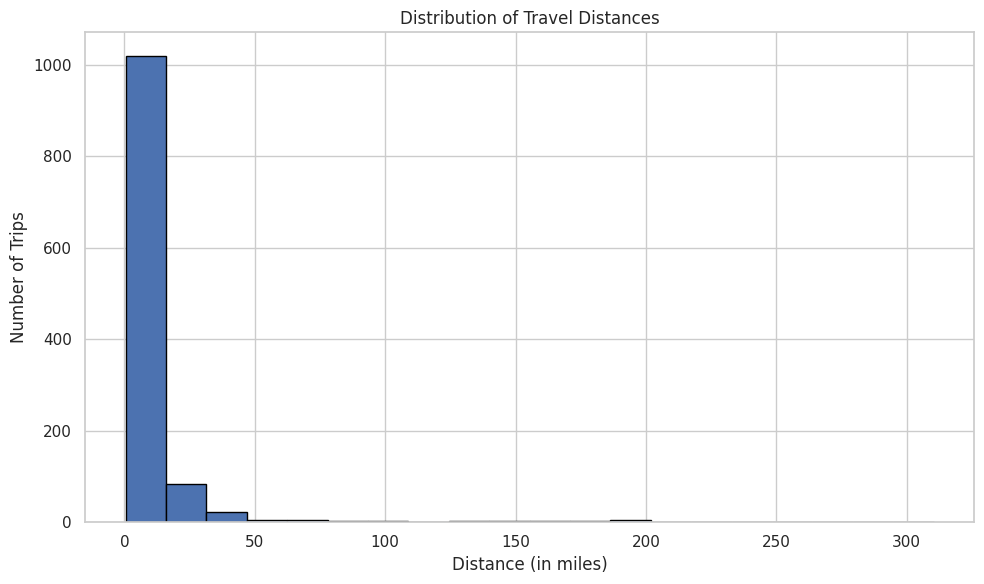

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['MILES'], bins=20, edgecolor='black')
plt.xlabel('Distance (in miles)')
plt.ylabel('Number of Trips')
plt.title('Distribution of Travel Distances')
plt.grid(True)
plt.tight_layout()
plt.show()

The code snippet you provided creates a histogram to visualize the distribution of travel distances in your dataset.

# **8. Route Optimization:** Optimize travel routes based on mileage and travel purposes.

In [ ]:
travel_optimization = df.groupby('PURPOSE')['MILES'].mean()
travel_optimization

PURPOSE
Airport/Travel       5.500000
Between Offices     10.944444
Charity ($)         15.100000
Commute            180.200000
Customer Visit      20.688119
Errand/Supplies      3.968750
Meal/Entertain       5.698125
Meeting             15.247594
Moving               4.550000
Temporary Site      10.474000
Name: MILES, dtype: float64

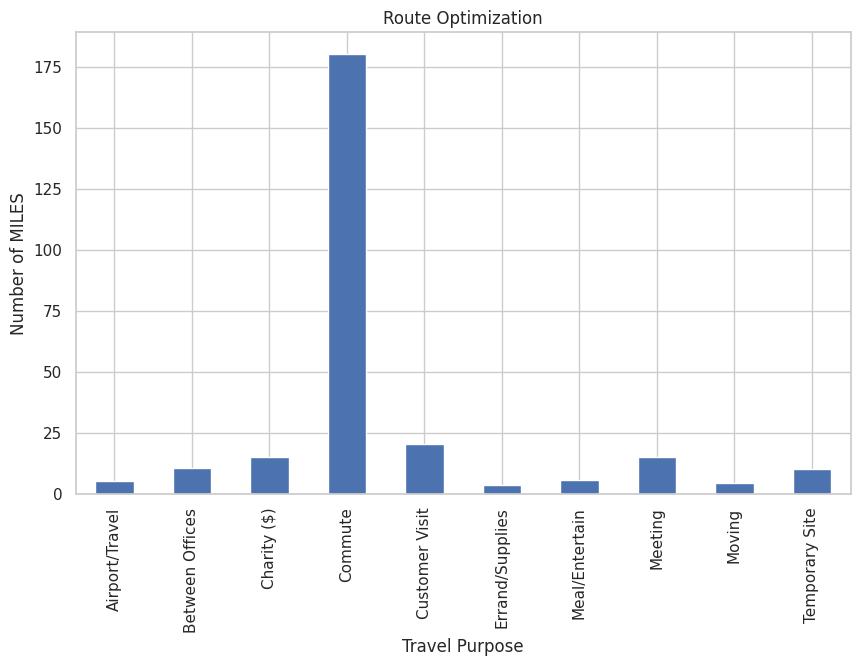

In [ ]:
plt.figure(figsize=(10, 6))
travel_optimization.plot(kind='bar')
plt.xlabel('Travel Purpose')
plt.ylabel('Number of MILES')
plt.title('Route Optimization')
plt.grid(True)
plt.show()

The graph is plotted between the Travel Prpose and Number of Miles and from this we can say that Commute one's has the highest Route Optimization

# **9. Frequent Travel Destinations:** Identify frequently visited destinations for different travel categories.

In [ ]:
frequent_destinations = df.groupby('PURPOSE')['START'].value_counts()
N= 5
top_destinations = frequent_destinations.groupby('PURPOSE').nlargest(N)

In [ ]:
for purpose, destination_counts in top_destinations.groupby('PURPOSE'):
    print(f"Top {N} frequent destinations for '{purpose}' travel:")
    for destination, count in destination_counts.items():
        print(f"{destination} - {count} visits")
    print()

Top 5 frequent destinations for 'Airport/Travel' travel:
('Airport/Travel', 'Airport/Travel', 'Unknown Location') - 2 visits
('Airport/Travel', 'Airport/Travel', 'Kar?chi') - 1 visits

Top 5 frequent destinations for 'Between Offices' travel:
('Between Offices', 'Between Offices', 'Whitebridge') - 3 visits
('Between Offices', 'Between Offices', 'Berkeley') - 2 visits
('Between Offices', 'Between Offices', 'Cary') - 2 visits
('Between Offices', 'Between Offices', 'Morrisville') - 2 visits
('Between Offices', 'Between Offices', 'San Francisco') - 2 visits

Top 5 frequent destinations for 'Charity ($)' travel:
('Charity ($)', 'Charity ($)', 'Banner Elk') - 1 visits

Top 5 frequent destinations for 'Commute' travel:
('Commute', 'Commute', 'Boone') - 1 visits

Top 5 frequent destinations for 'Customer Visit' travel:
('Customer Visit', 'Customer Visit', 'Morrisville') - 20 visits
('Customer Visit', 'Customer Visit', 'Cary') - 18 visits
('Customer Visit', 'Customer Visit', 'Apex') - 5 visits


 top destinations for each purpose


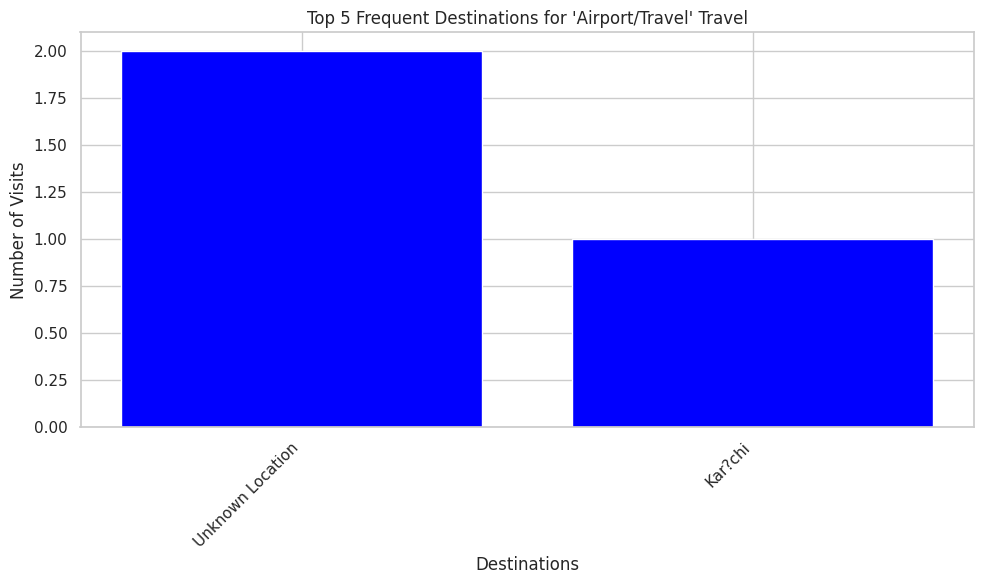

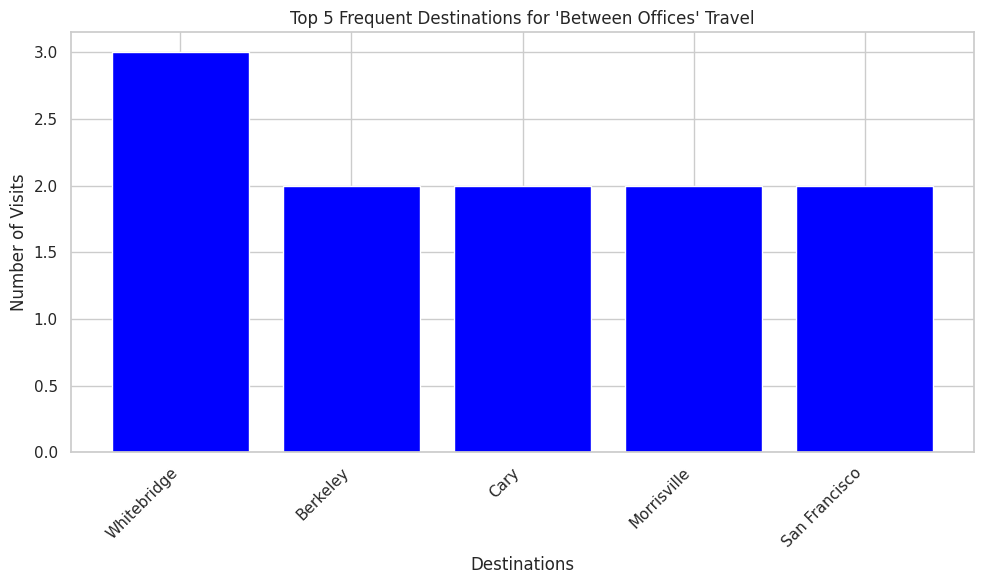

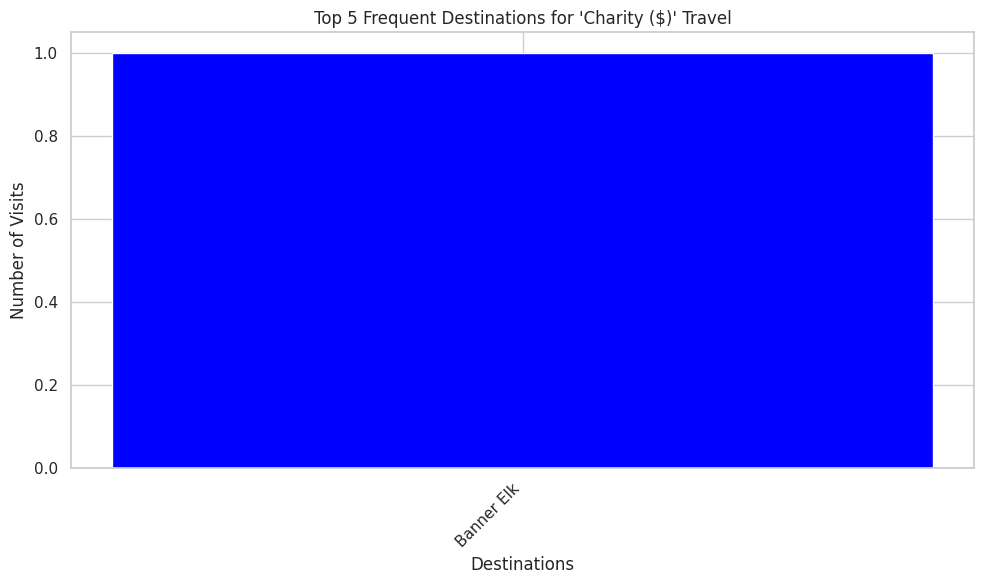

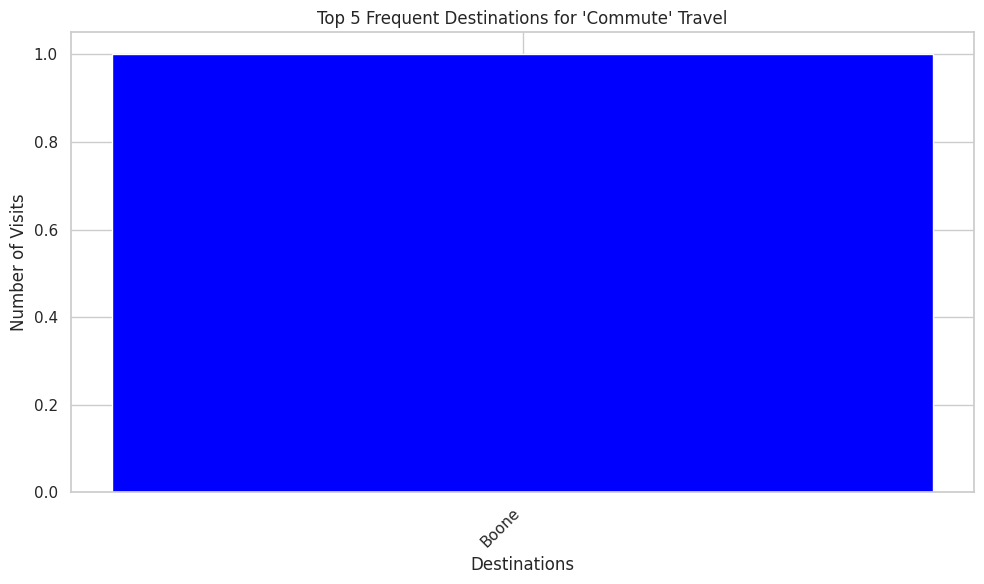

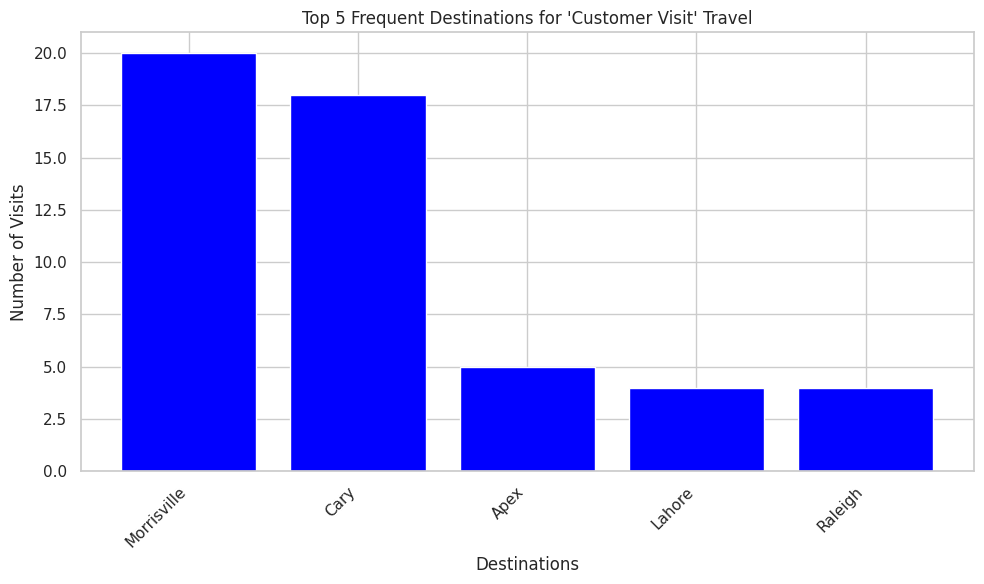

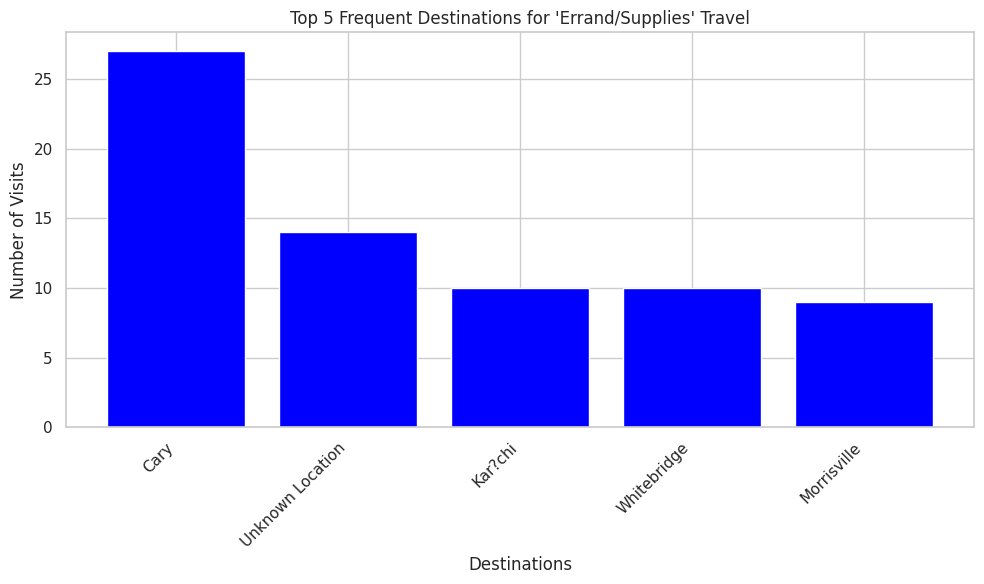

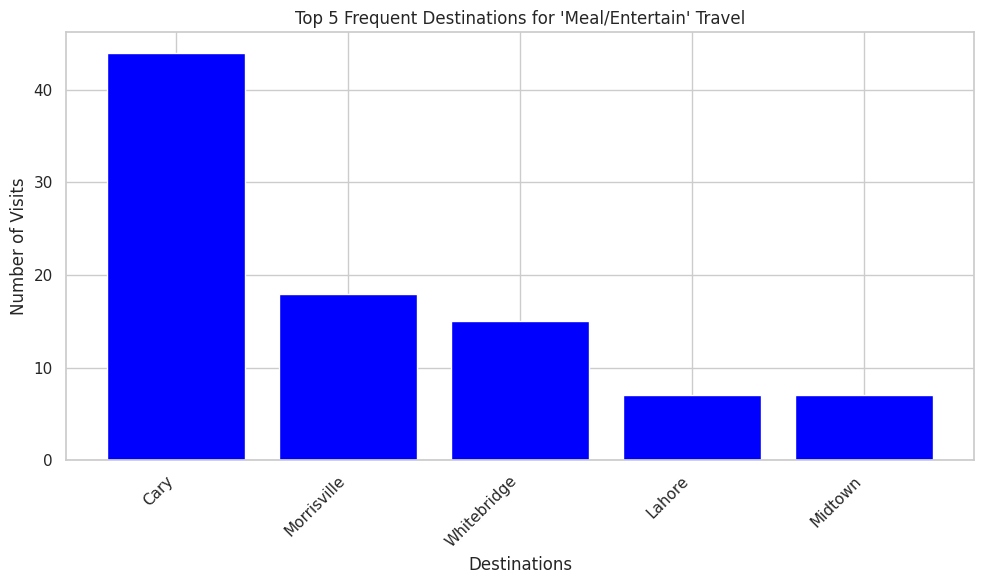

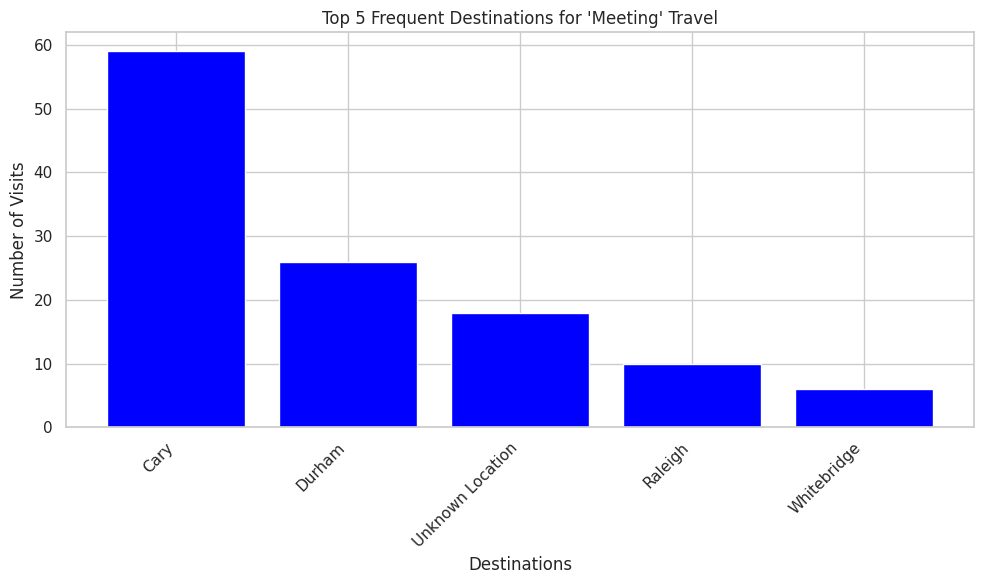

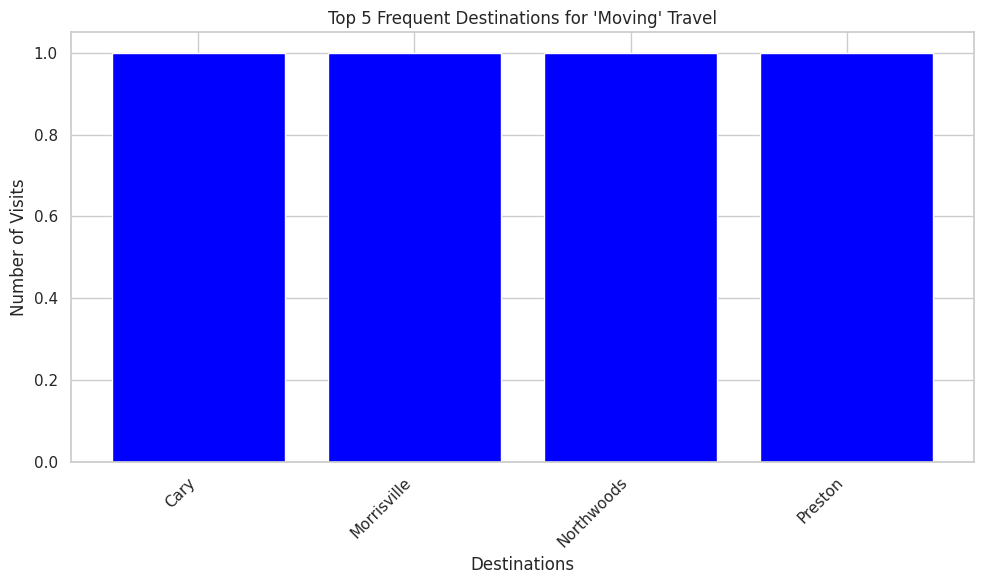

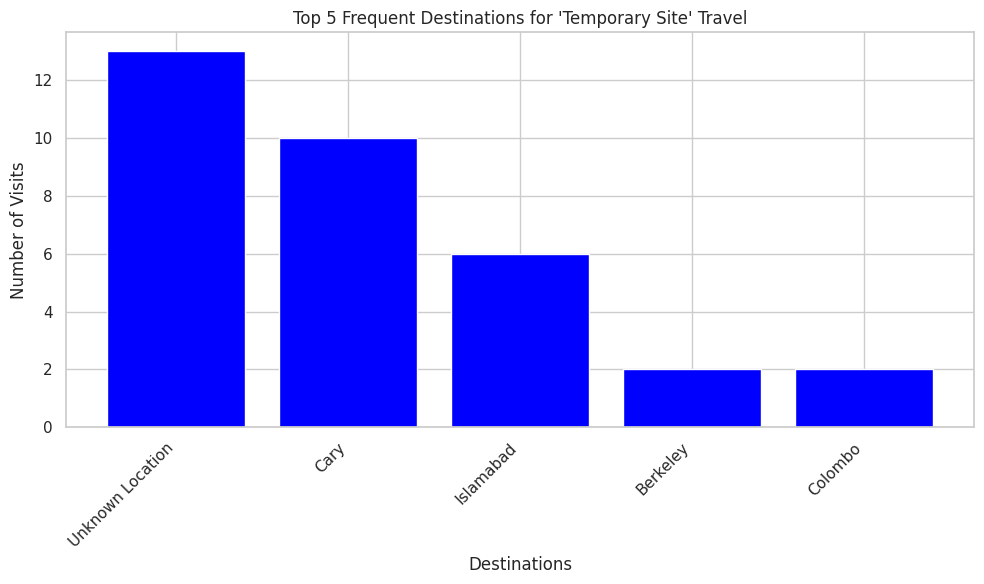

In [ ]:
frequent_destinations = df.groupby('PURPOSE')['START'].value_counts()
N = 5
top_destinations = frequent_destinations.groupby('PURPOSE', group_keys=False).nlargest(N)

for purpose, destination_counts in top_destinations.groupby('PURPOSE'):
    destinations = [destination[1] for destination in destination_counts.index]
    counts = list(destination_counts.values)


    plt.figure(figsize=(10, 6))
    plt.bar(destinations, counts, color='blue')
    plt.xlabel('Destinations')
    plt.ylabel('Number of Visits')
    plt.title(f"Top {N} Frequent Destinations for '{purpose}' Travel")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


frequently visited destinations for different travel categories Top 5 Frequent Destinations for purpose Travel

# **10. Travel Cost Estimation:** Estimate travel costs based on mileage and travel purposes.

In [ ]:
data = {
    'MILES': [50, 30, 20, 40],
    'PURPOSE': ['Business', 'Commute', 'Leisure', 'Business']
}
df = pd.DataFrame(data)
fuel_cost_per_mile =10
maintenance_cost_per_mile = 5
parking_fee_per_trip = {'Business': 5, 'Commute': 2, 'Leisure': 3}
df['Fuel_Cost'] = df['MILES'] * fuel_cost_per_mile
df['Maintenance_Cost'] = df['MILES'] * maintenance_cost_per_mile
df['Parking_Fee'] = df['PURPOSE'].map(parking_fee_per_trip)
df['Total_Cost'] = df['Fuel_Cost'] + df['Maintenance_Cost'] + df['Parking_Fee']

print(df)


   MILES   PURPOSE  Fuel_Cost  Maintenance_Cost  Parking_Fee  Total_Cost
0     50  Business        500               250            5         755
1     30   Commute        300               150            2         452
2     20   Leisure        200               100            3         303
3     40  Business        400               200            5         605


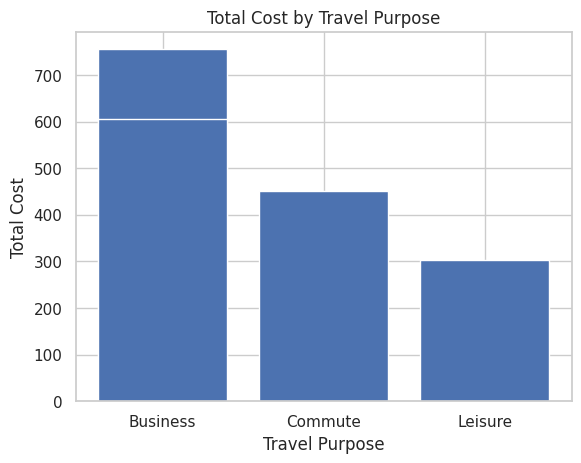

In [ ]:
plt.bar(df['PURPOSE'], df['Total_Cost'])
plt.xlabel('Travel Purpose')
plt.ylabel('Total Cost')
plt.title('Total Cost by Travel Purpose')
plt.show()

# **11. Travel Behavior Trends:** Study trends in travel behavior over time, such as changes in travel frequency or purpose.

<Figure size 1200x1000 with 0 Axes>

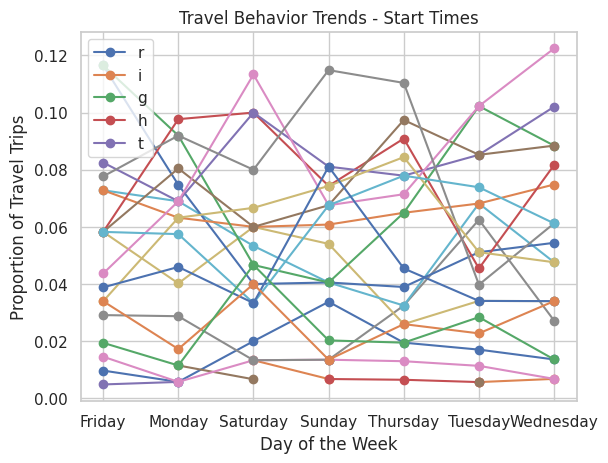

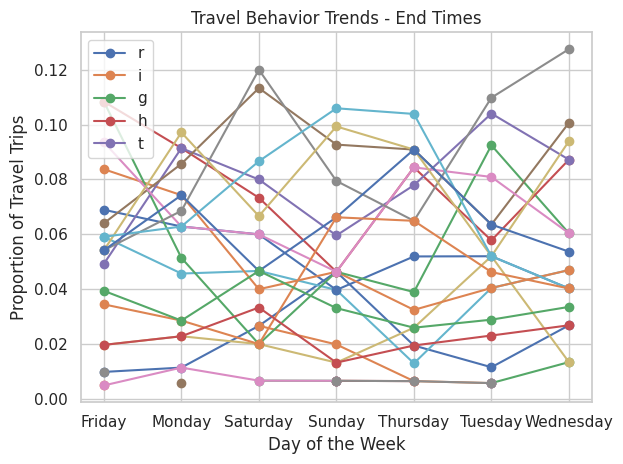

In [ ]:
start_day = start_day_hour_counts.div(start_day_hour_counts.sum(axis=1), axis=0)
end_day = end_day_hour_counts.div(end_day_hour_counts.sum(axis=1), axis=0)
plt.figure(figsize=(12, 10))

start_day.plot(kind='line', marker='o')
plt.title('Travel Behavior Trends - Start Times')
plt.ylabel('Proportion of Travel Trips')
plt.xlabel('Day of the Week')
plt.legend('right')
end_day.plot(kind='line', marker='o')
plt.title('Travel Behavior Trends - End Times')
plt.ylabel('Proportion of Travel Trips')
plt.xlabel('Day of the Week')
plt.legend('right',loc='best')
plt.tight_layout()
plt.show()


the  travel behavior over time, such as changes in travel frequency or purpose 'start_day' and 'end_day' dataframes or series

